In [1]:
import pandas as pd

# Load the main dataset
df = pd.read_csv('main3.csv')
display(df.head())
## Encode the categorical number
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# In this project, we will use district and class
## District is related to city_region and province
## While class is related to spending.
df['encode_district'] = label_encoder.fit_transform(df['district'])
df['encode_city_region'] = label_encoder.fit_transform(df['city_region'])
df['encode_province'] = label_encoder.fit_transform(df['province'])
df['encode_village'] = label_encoder.fit_transform(df['village'])

df['encode_class'] = label_encoder.fit_transform(df['class'])
# df['encode_speding'] = label_encoder.fit_transform(df['spending'])

# Take only number since regression model could only take number as input variables
df_num = df.select_dtypes(exclude=['object'])
print(df_num.info())

# # Take columns with null
# null_col = [col for col in df_num if df_num[col].isnull().values.any()]
# null_col

# # Fill with median
# for na_col in null_col:
#     df_num[na_col] = df_num[na_col].fillna(df_num[na_col].median())
# df_num.head()

,province,city_region,district,village,rwi,class,spending,tower_count,geometry,population,dim
0,DKI JAKARTA,KOTA JAKARTA PUSAT,GAMBIR,DURIPULO,1.025996,High,1.200.000 - 6.000.000,442,"MULTIPOLYGON (((106.80143 -6.1580436, 106.8014...",25058.0,0.017639
1,DKI JAKARTA,KOTA JAKARTA SELATAN,PASAR MINGGU,RAGUNAN,1.040410,High,1.200.000 - 6.000.000,1363,"MULTIPOLYGON (((106.8289589 -6.2794742, 106.82...",43728.0,0.031170
2,DKI JAKARTA,KOTA JAKARTA SELATAN,KEBAYORAN BARU,RAWABARAT,1.021368,High,1.200.000 - 6.000.000,416,"MULTIPOLYGON (((106.81463 -6.2329347, 106.8147...",7369.0,0.056453
3,DKI JAKARTA,KOTA JAKARTA SELATAN,SETIA BUDI,KARET,1.600545,Very High,>6.000.000,903,"MULTIPOLYGON (((106.8304955 -6.2113739, 106.83...",21210.0,0.042574
4,DKI JAKARTA,KOTA JAKARTA SELATAN,SETIA BUDI,KARET,1.600545,Very High,>6.000.000,903,"MULTIPOLYGON (((106.8304955 -6.2113739, 106.83...",14033.0,0.064348


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2217 entries, 0 to 2216
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rwi                 2217 non-null   float64
 1   tower_count         2217 non-null   int64  
 2   population          2217 non-null   float64
 3   dim                 2217 non-null   float64
 4   encode_district     2217 non-null   int64  
 5   encode_city_region  2217 non-null   int64  
 6   encode_province     2217 non-null   int64  
 7   encode_village      2217 non-null   int64  
 8   encode_class        2217 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 156.0 KB
None


In [2]:
print(df_num.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2217 entries, 0 to 2216
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rwi                 2217 non-null   float64
 1   tower_count         2217 non-null   int64  
 2   population          2217 non-null   float64
 3   dim                 2217 non-null   float64
 4   encode_district     2217 non-null   int64  
 5   encode_city_region  2217 non-null   int64  
 6   encode_province     2217 non-null   int64  
 7   encode_village      2217 non-null   int64  
 8   encode_class        2217 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 156.0 KB
None


In [3]:
import statsmodels.api as sm

#### Here we can see that the OLS R2 is so low
#### R2 means how the model can explain the independent variable (RWI) with the dependent variables (the rest)
#### The p-value is fine, but this is inadequate for the data to be used in the model.

In [4]:
# Fit OLS model
y = df_num['rwi']
x = df_num.drop(['rwi','dim'],axis=1)
x = sm.add_constant(x)
# See the shape
print(x.shape,y.shape)

# Fit the model and print the summary
mod = sm.OLS(y,x)
res = mod.fit()

print(res.summary())


(2217, 8) (2217,)
                            OLS Regression Results                            
Dep. Variable:                    rwi   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     117.0
Date:                Mon, 06 Nov 2023   Prob (F-statistic):          2.31e-146
Time:                        08:59:54   Log-Likelihood:                -393.32
No. Observations:                2217   AIC:                             802.6
Df Residuals:                    2209   BIC:                             848.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const             

## This is the variables of reverse encode for each district, province, city_region and village

In [5]:
# District
encode_dist = df[['encode_district','district']].drop_duplicates()
# encode_dist = dict(zip(encode_dist['encode_district'],encode_dist['district']))

# Province
encode_prov = df[['encode_province','province']].drop_duplicates()
# encode_prov = dict(zip(encode_prov['encode_province'],encode_prov['province']))

# City region
encode_cr = df[['encode_city_region','city_region']].drop_duplicates()
# encode_cr = dict(zip(encode_cr['encode_city_region'],encode_cr['city_region']))

# Village
encode_village = df[['encode_village','village']].drop_duplicates()
# encode_village = dict(zip(encode_village['encode_village'],encode_village['village']))

print('Total encoded district = ',encode_dist.shape[0],' , Unique district = ',df['district'].nunique())
print('Total encoded province = ',encode_prov.shape[0],' , Unique province = ',df['province'].nunique())
print('Total encoded city_region = ',encode_cr.shape[0],' , Unique city_region = ',df['city_region'].nunique())
print('Total encoded village = ',encode_village.shape[0],' , Unique village = ',df['village'].nunique())


Total encoded district =  183  , Unique district =  183
Total encoded province =  3  , Unique province =  3
Total encoded city_region =  13  , Unique city_region =  13
Total encoded village =  1214  , Unique village =  1214


### Remove multicollinearity issue (just like dim is derived from tower_count/population)

In [6]:
# Check multicollinearirty
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = x

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,feature,VIF
0,const,123.983195
1,tower_count,1.370476
2,population,1.328476
3,encode_district,1.062950
4,encode_city_region,18.225842
5,encode_province,18.142190
6,encode_village,1.029965
7,encode_class,1.044159


### Check the regression line tower_count with RWI, seems showing a good representation

<Axes: xlabel='tower_count', ylabel='rwi'>

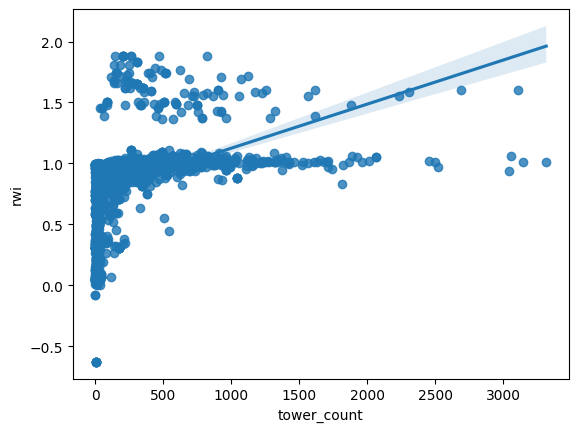

In [7]:
import seaborn as sns

sns.regplot(data=df, x="tower_count", y="rwi")

<Axes: xlabel='tower_count', ylabel='Count'>

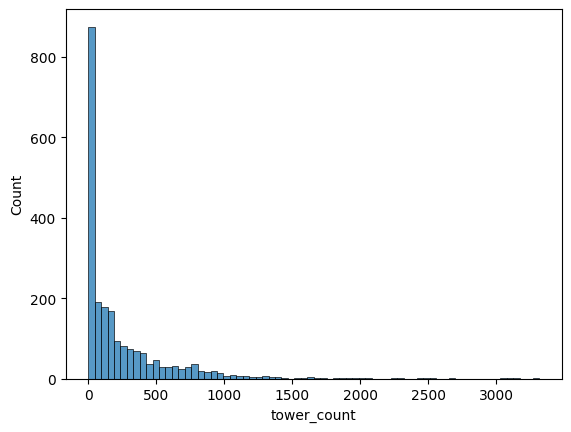

In [8]:
# Data is very positive skewed, one of the assumption of LR that the data must be normally distributed
sns.histplot(data=df_num, x="tower_count")

<Axes: xlabel='population', ylabel='Count'>

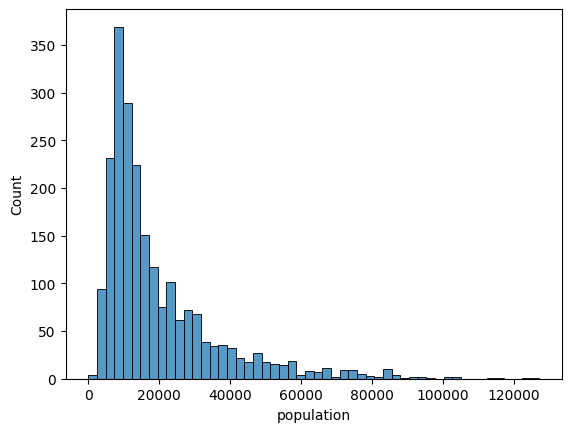

In [9]:
# Same as population but this is due to null value
sns.histplot(data=df_num, x="population")

<Axes: xlabel='rwi', ylabel='Count'>

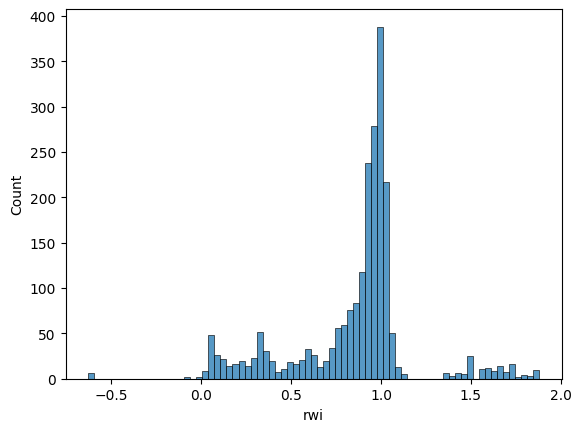

In [10]:
sns.histplot(data=df_num, x="rwi")

### We do logging to normalize skewed data

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform([[x] for x in df_num['rwi']])
scaled

array([[0.65967931],
       [0.66542505],
       [0.65783436],
       ...,
       [0.66780437],
       [0.66780437],
       [0.55189596]])

In [12]:
import math

df_num['log_tower_count'] = df_num['tower_count'].apply(lambda x: math.log(x))
df_num['log_population'] = df_num['population'].apply(lambda x: math.log(x + 0.0001) if x == 0 else math.log(x))

df_num.loc[df_num['log_population']<= 0,'log_population'] = df_num['log_population'].median()
df_num['log_rwi'] = scaled

df_num

,rwi,tower_count,population,dim,encode_district,encode_city_region,encode_province,encode_village,encode_class,log_tower_count,log_population,log_rwi
0,1.025996,442,25058.0,0.017639,64,6,1,327,0,6.091310,10.128948,0.659679
1,1.040410,1363,43728.0,0.031170,127,7,1,922,0,7.217443,10.685744,0.665425
2,1.021368,416,7369.0,0.056453,83,7,1,941,0,6.030685,8.905037,0.657834
3,1.600545,903,21210.0,0.042574,151,7,1,525,3,6.805723,9.962228,0.888713
4,1.600545,903,14033.0,0.064348,151,7,1,525,3,6.805723,9.549167,0.888713
...,...,...,...,...,...,...,...,...,...,...,...,...
2212,1.046379,759,9790.0,0.077528,163,4,2,702,0,6.632002,9.189117,0.667804
2213,1.046379,759,8263.0,0.091855,163,4,2,702,0,6.632002,9.019543,0.667804
2214,1.046379,759,58079.0,0.013068,163,4,2,702,0,6.632002,10.969559,0.667804
2215,1.046379,759,8089.0,0.093831,163,4,2,702,0,6.632002,8.998260,0.667804


### After logging

<Axes: xlabel='log_tower_count', ylabel='Count'>

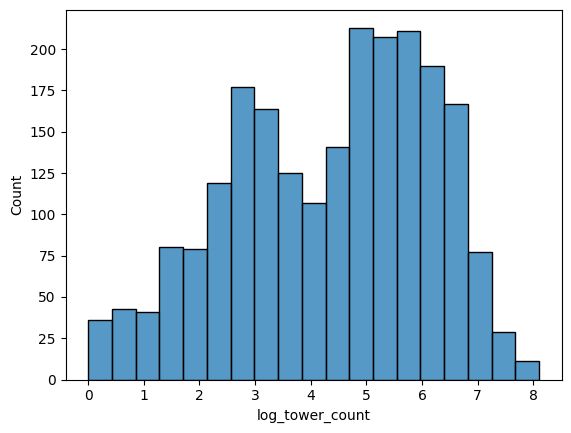

In [13]:
sns.histplot(data=df_num, x="log_tower_count")

<Axes: xlabel='log_population', ylabel='Count'>

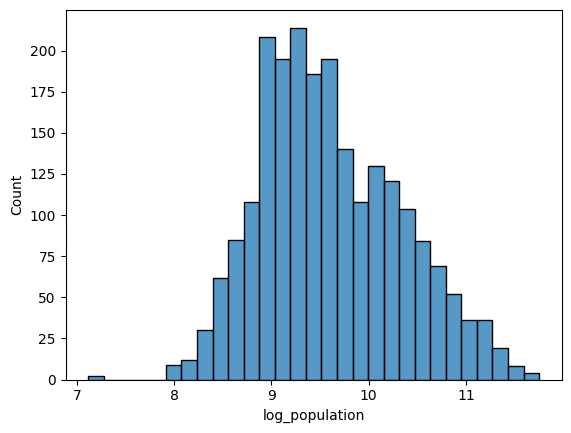

In [14]:
sns.histplot(data=df_num, x="log_population")

<Axes: xlabel='log_rwi', ylabel='Count'>

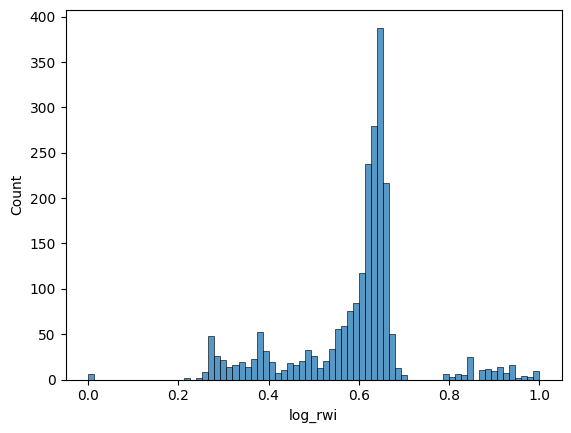

In [15]:
sns.histplot(data=df_num, x="log_rwi")

### Now the R2 shows some improvement, now the data is ready to use

### Note: the p-value of log_population > 0.05, which is unuseable

In [16]:
# Fit OLS model with log_rwi
# Logging RWI doesnt change the R2, therefore, better to use normal RWI
y = df_num['log_rwi']
x = df_num.drop(['rwi','dim','tower_count','log_population','log_rwi','encode_city_region'],axis=1)
x = sm.add_constant(x)

print(x.shape,y.shape)

mod = sm.OLS(y,x)
res = mod.fit()

print(res.summary())


(2217, 7) (2217,)
                            OLS Regression Results                            
Dep. Variable:                log_rwi   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     245.2
Date:                Mon, 06 Nov 2023   Prob (F-statistic):          1.44e-240
Time:                        08:59:58   Log-Likelihood:                 1861.6
No. Observations:                2217   AIC:                            -3709.
Df Residuals:                    2210   BIC:                            -3669.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.45

In [17]:
# Fit OLS model
# Logging RWI doesnt change the R2, therefore, better to use normal RWI
y = df_num['rwi']
x = df_num.drop(['rwi','dim','tower_count','log_population','log_rwi'],axis=1)
x = sm.add_constant(x)

print(x.shape,y.shape)

mod = sm.OLS(y,x)
res = mod.fit()

print(res.summary())


(2217, 8) (2217,)
                            OLS Regression Results                            
Dep. Variable:                    rwi   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     215.4
Date:                Mon, 06 Nov 2023   Prob (F-statistic):          3.05e-244
Time:                        08:59:58   Log-Likelihood:                -166.12
No. Observations:                2217   AIC:                             348.2
Df Residuals:                    2209   BIC:                             393.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const             

## Head to Linear Regrression

In [18]:
from sklearn.model_selection import train_test_split
x = df_num.drop(['rwi','dim','tower_count','log_population','log_rwi'],axis=1)

# Split the data, and put test_size as 0.2 -> there'll be
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.head()

,population,encode_district,encode_city_region,encode_province,encode_village,encode_class,log_tower_count
198,18877.0,160,1,2,222,0,5.257495
49,13482.0,11,3,2,301,0,4.317488
173,8495.0,97,12,0,958,2,3.091042
1861,25828.0,89,1,2,31,0,3.465736
715,76755.0,24,5,1,943,0,6.843750


In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Put the LR into action

reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_train, y_train),reg.coef_,reg.intercept_

(0.40051197158593344,
 array([-8.05731673e-07, -4.01155989e-04,  2.87582023e-02,  1.36755075e-01,
        -2.94532479e-05, -3.61139806e-02,  1.03256882e-01]),
 0.1861801978648443)

In [20]:
# Put this as the standard accuracy calculation
def metric_of_accuracy(model,X_train = X_train, X_test = X_test,y_test=y_test,cv = True):
    import sklearn.metrics
    import math
    import scipy

    y_pred = model.predict(X_test)

    mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    mape = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)
    mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
    coefficient_of_dermination = sklearn.metrics.r2_score(y_test, y_pred)

    # The model runs very good, lets do the cross_validation to see whether this is due to overfitting
    print("Mean Squared Error = ",mse," ,Root MSE = ",rmse,
          " ,Mean Absolute Percentage Error = ",mape,' ,Mean Absolute Error=',mae)

    from sklearn.model_selection import cross_val_score
    if cv:
        scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
        print('R2 scores = ',scores)

metric_of_accuracy(reg)

Mean Squared Error =  0.06506835608507472  ,Root MSE =  0.2550849977655972  ,Mean Absolute Percentage Error =  0.49918521372524083  ,Mean Absolute Error= 0.17684306766043426
R2 scores =  [0.38113898 0.40689447 0.38151149 0.37410587 0.42708187]


### 1. Lets take the basis of MAE 0.16 from LR (closer to 0 the better)

### GBR (Grardient Boosting Regressor)

In [21]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
#                 # 'subsample'    : [0.9, 0.5, 0.2, 0.1],
#                 'n_estimators' : [100,200],
#                 'max_depth'    : [4,6]
#                 }

# GBR = GradientBoostingRegressor()
# grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 5, n_jobs=-1)
# grid_GBR.fit(X_train, y_train)
# print(" Results from Grid Search " )
# print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
# print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
# print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [24]:
GBR = GradientBoostingRegressor(learning_rate= 0.04, max_depth= 6, n_estimators= 200)
GBR.fit(X_train, y_train)

metric_of_accuracy(GBR)

Mean Squared Error =  0.0013881791450780596  ,Root MSE =  0.03725827619574018  ,Mean Absolute Percentage Error =  0.04833043945152844  ,Mean Absolute Error= 0.025421291377247364
R2 scores =  [0.96882662 0.98145444 0.96339681 0.98530407 0.98000108]


### 2. GBR shows significant result by improving MAE from 0.16 -> 0.03

### SVR (Support Vector Regression)

In [ ]:
from sklearn import svm

clf = svm.SVR()
clf.fit(X_train, y_train)

metric_of_accuracy(clf)

Mean Squared Error =  0.055819157669334846  ,Root MSE =  0.23626078318107482  ,Mean Absolute Percentage Error =  0.5222062858195151  ,Mean Absolute Error= 0.1404112749749109
R2 scores =  [0.28121419 0.28857082 0.32064626 0.30325463 0.30372321]


### 3. SVR does not significantly improve from LR but the standard of 0.16 -> 0.14 by the SVR

### Ridge Regression

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# mean_squared_error module for applying RMSE
from sklearn.metrics import mean_squared_error as mse

# hide warnings
import warnings
warnings.filterwarnings('ignore')#seting alpha as 20
alpha = 0.0001

# Initialising Ridge() with above alpha
ridge =Ridge(alpha=alpha)

#fitting model
ridge.fit(X_train,y_train)

metric_of_accuracy(ridge)



Mean Squared Error =  0.05321362040909244  ,Root MSE =  0.23068077598510986  ,Mean Absolute Percentage Error =  0.45992291012664255  ,Mean Absolute Error= 0.16287800807613423
R2 scores =  [0.41012339 0.34777801 0.37177457 0.41243915 0.40368179]


### 4. Ridge doesnt show any differences with LR although we put the regularization, still at 0.16

### Neural Network for regression

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor


NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               640       
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 165505 (646.50 KB)
Trainable params: 165505 (646.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights_new-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/500
36/39 [==========================>...] - ETA: 0s - loss: 0.3232 - mean_absolute_error: 0.3232
Epoch 1: val_loss improved from inf to 0.17001, saving model to Weights_new-001--0.17001.hdf5
39/39 [==============================] - 2s 11ms/step - loss: 0.3162 - mean_absolute_error: 0.3162 - val_loss: 0.1700 - val_mean_absolute_error: 0.1700
Epoch 2/500
35/39 [=========================>....] - ETA: 0s - loss: 0.2027 - mean_absolute_error: 0.2027
Epoch 2: val_loss did not improve from 0.17001
39/39 [==============================] - 0s 6ms/step - loss: 0.2063 - mean_absolute_error: 0.2063 - val_loss: 0.2142 - val_mean_absolute_error: 0.2142
Epoch 3/500
39/39 [==============================] - ETA: 0s - loss: 0.2092 - mean_absolute_error: 0.2092
Epoch 3: val_loss did not improve from 0.17001
39/39 [==============================] - 0s 5ms/step - loss: 0.2092 - mean_absolute_error: 0.2092 - val_loss: 0.1955 - val_mean_absolute_error: 0.1955
Epoch 4/500
36/39 [=====================

In [ ]:
wights_file = 'Weights_new-449--0.03940.hdf5' # choose the best checkpoint
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

metric_of_accuracy(NN_model,cv=False)

13/13 [==============================] - 1s 10ms/step
Mean Squared Error =  0.004130546071379711  ,Root MSE =  0.06426932449761481  ,Mean Absolute Percentage Error =  0.09162101560555985  ,Mean Absolute Error= 0.040065213039976115


### MAE score 0.04, 0.01 lesser than GBR, therefore the conclusion GBR is the best to predict the RWI based on the cell tower count and population and district.

# ANALYSIS PART ------------------------------------------------------------------------------------------------------------------

# Check the prediction on test dataframe
# Do this with map visualization

In [26]:
# generate y_pred with GBR

y_pred = GBR.predict(X_test)
y_pred

array([ 0.32852527,  0.59056096,  0.32178355,  0.95825318,  0.91423277,
        0.63468361,  0.87087862,  0.95481038,  0.95177384,  0.91785644,
        0.30481357,  0.5738387 ,  0.92011541,  0.75856012,  0.93235414,
        0.9198964 ,  0.93690918,  0.45890784,  1.53352631,  0.7534556 ,
        0.71966525,  1.00763537,  0.96613028,  0.99185074,  1.02139974,
        0.7564108 ,  1.02721936,  0.76136115,  1.01096705,  0.97863947,
        0.1096709 ,  0.94448654,  0.94891676,  0.90371339,  1.01985517,
        0.95772745,  0.94234696,  1.00405737,  1.00196005,  0.97879894,
        0.41731217,  0.80606994,  0.08899912,  0.98788442,  0.70729984,
        0.30409628,  0.94857341,  0.93689193,  0.77961494,  0.73624395,
        0.3003399 ,  0.94298768,  0.97561546,  1.00985775,  0.98282286,
        1.02951307,  1.01808985,  0.97300389,  1.00071926,  1.72920654,
        0.89509785,  1.01696541,  0.98888019,  0.9313422 ,  0.74460139,
        0.96687642,  0.13327371,  0.98667929,  0.75939604,  0.97

In [27]:
# Use copy so original dataframe wont be affected to any operation
test_df = X_test.copy()

print(test_df)
test_df['y_true'] = y_test

# For unique purpose after join
print(test_df.shape,test_df[['encode_village','y_true','population']].drop_duplicates().shape)

# Add new col to present
test_df['y_pred'] = y_pred
test_df['low_high_pred'] = 'No Improvement Prediction'

test_df.loc[test_df['y_true'] >= test_df['y_pred'],'low_high_pred'] = 'Equal or Higher prediction'
test_df

      population  encode_district  encode_city_region  encode_province  \
948       5218.0              158                   1                2   
218       4864.0               86                   0                2   
1080     52429.0              155                  12                0   
414       8480.0               56                   1                2   
2012     29947.0               40                  12                0   
...          ...              ...                 ...              ...   
23       33156.0              164                   1                2   
1891     14802.0              117                  12                0   
427      11498.0               46                   4                2   
1628     72191.0               85                   5                1   
2018      8471.0              107                  12                0   

      encode_village  encode_class  log_tower_count  
948             1098             1         0.693147  
218

,population,encode_district,encode_city_region,encode_province,encode_village,encode_class,log_tower_count,y_true,y_pred,low_high_pred
948,5218.0,158,1,2,1098,1,0.693147,0.302624,0.328525,No Improvement Prediction
218,4864.0,86,0,2,702,2,1.386294,0.569396,0.590561,No Improvement Prediction
1080,52429.0,155,12,0,846,1,1.386294,0.329908,0.321784,Equal or Higher prediction
414,8480.0,56,1,2,290,0,3.688879,0.995344,0.958253,Equal or Higher prediction
2012,29947.0,40,12,0,320,0,4.682131,0.927948,0.914233,Equal or Higher prediction
...,...,...,...,...,...,...,...,...,...,...
23,33156.0,164,1,2,1110,0,3.988984,0.982826,0.953970,Equal or Higher prediction
1891,14802.0,117,12,0,402,0,4.304065,0.962934,0.942194,Equal or Higher prediction
427,11498.0,46,4,2,705,0,6.347389,1.063600,1.035200,Equal or Higher prediction
1628,72191.0,85,5,1,325,3,7.112327,1.577586,1.541935,Equal or Higher prediction


In [29]:
import plotly.express as px
import plotly.graph_objects as go

piechart = test_df.groupby(['low_high_pred'])['encode_district'].count().reset_index()

fig = px.pie(piechart, values='encode_district',names='low_high_pred'
              ,title='Percentage of higher and lower prediction'
              ,template = 'plotly_dark')
fig.show()

In [30]:
# Boxplot of differences between both of prediction

test_df['gap_true_pred'] = abs(test_df['y_true'] - test_df['y_pred'])

## It shows the differences are not significant and lower_prediction error
## 0.7 error prediction is very high. while the rest lies between 0.1 - 0.4
fig = px.box(test_df, y="gap_true_pred",x='low_high_pred')
fig.show()

### 1. median rwi for the whole great jkt
### 2. rwi lesser than the median rwi

In [31]:
# Create the dataset for the median RWI
median_rwi = df['rwi'].median()
print(median_rwi)

df['lower_higher_rwi'] = 'Lower RWI than median RWI'

# Set which region has lower or higher RWI
df.loc[df['rwi'] >= median_rwi,'lower_higher_rwi'] = 'Equal or higher RWI than median RWI'
df.head()

0.9417334


,province,city_region,district,village,rwi,class,spending,tower_count,geometry,population,dim,encode_district,encode_city_region,encode_province,encode_village,encode_class,lower_higher_rwi
0,DKI JAKARTA,KOTA JAKARTA PUSAT,GAMBIR,DURIPULO,1.025996,High,1.200.000 - 6.000.000,442,"MULTIPOLYGON (((106.80143 -6.1580436, 106.8014...",25058.0,0.017639,64,6,1,327,0,Equal or higher RWI than median RWI
1,DKI JAKARTA,KOTA JAKARTA SELATAN,PASAR MINGGU,RAGUNAN,1.040410,High,1.200.000 - 6.000.000,1363,"MULTIPOLYGON (((106.8289589 -6.2794742, 106.82...",43728.0,0.031170,127,7,1,922,0,Equal or higher RWI than median RWI
2,DKI JAKARTA,KOTA JAKARTA SELATAN,KEBAYORAN BARU,RAWABARAT,1.021368,High,1.200.000 - 6.000.000,416,"MULTIPOLYGON (((106.81463 -6.2329347, 106.8147...",7369.0,0.056453,83,7,1,941,0,Equal or higher RWI than median RWI
3,DKI JAKARTA,KOTA JAKARTA SELATAN,SETIA BUDI,KARET,1.600545,Very High,>6.000.000,903,"MULTIPOLYGON (((106.8304955 -6.2113739, 106.83...",21210.0,0.042574,151,7,1,525,3,Equal or higher RWI than median RWI
4,DKI JAKARTA,KOTA JAKARTA SELATAN,SETIA BUDI,KARET,1.600545,Very High,>6.000.000,903,"MULTIPOLYGON (((106.8304955 -6.2113739, 106.83...",14033.0,0.064348,151,7,1,525,3,Equal or higher RWI than median RWI


In [32]:
# See the percentage of higher or lower prediction
piechart = df.groupby(['lower_higher_rwi'])['encode_district'].count().reset_index()

fig = px.pie(piechart, values='encode_district',names='lower_higher_rwi'
            ,title='Percentage of higher or lower than the median RWI for whole Jakarta')
fig.show()

In [33]:
# # Create the dataset for the median RWI
test_df['lower_higher_rwi_pred'] = 'Lower RWI than median RWI'
test_df['lower_higher_rwi'] = 'Lower RWI than median RWI'


# Set which region has lower or higher RWI
test_df.loc[test_df['y_pred'] >= median_rwi,'lower_higher_rwi_pred'] = 'Equal or higher RWI than median RWI'
test_df.loc[test_df['y_true'] >= median_rwi,'lower_higher_rwi'] = 'Equal or higher RWI than median RWI'

test_df.head()

,population,encode_district,encode_city_region,encode_province,encode_village,encode_class,log_tower_count,y_true,y_pred,low_high_pred,gap_true_pred,lower_higher_rwi_pred,lower_higher_rwi
948,5218.0,158,1,2,1098,1,0.693147,0.302624,0.328525,No Improvement Prediction,0.025901,Lower RWI than median RWI,Lower RWI than median RWI
218,4864.0,86,0,2,702,2,1.386294,0.569396,0.590561,No Improvement Prediction,0.021165,Lower RWI than median RWI,Lower RWI than median RWI
1080,52429.0,155,12,0,846,1,1.386294,0.329908,0.321784,Equal or Higher prediction,0.008124,Lower RWI than median RWI,Lower RWI than median RWI
414,8480.0,56,1,2,290,0,3.688879,0.995344,0.958253,Equal or Higher prediction,0.037091,Equal or higher RWI than median RWI,Equal or higher RWI than median RWI
2012,29947.0,40,12,0,320,0,4.682131,0.927948,0.914233,Equal or Higher prediction,0.013716,Lower RWI than median RWI,Lower RWI than median RWI


In [46]:
test_df['true_predict'] = 'Different Prediction'
test_df.loc[test_df['lower_higher_rwi_pred'] == test_df['lower_higher_rwi'],'true_predict'] = 'Same Prediction'

# See the percentage of higher or lower prediction
piechart = test_df.groupby(['true_predict'])['encode_district'].count().reset_index()

fig = px.pie(piechart, values='encode_district',names='true_predict'
            ,title='Model prediction on test dataset RWI'
            ,template='plotly_dark')
fig.show()

In [35]:
# Merge the data between test dataframe and add on lower_higher_rwi

print("Before the district",test_df.shape)
test_df = test_df.merge(df[['encode_village','rwi','population','geometry']].rename(columns={'rwi':'y_true'}).drop_duplicates(),how='left',on=['encode_village','y_true','population'])
print('After',test_df.shape)

test_df.head()

Before the district (444, 14)
After (444, 15)


,population,encode_district,encode_city_region,encode_province,encode_village,encode_class,log_tower_count,y_true,y_pred,low_high_pred,gap_true_pred,lower_higher_rwi_pred,lower_higher_rwi,true_predict,geometry
0,5218.0,158,1,2,1098,1,0.693147,0.302624,0.328525,No Improvement Prediction,0.025901,Lower RWI than median RWI,Lower RWI than median RWI,Same Prediction,"MULTIPOLYGON (((107.07053 -6.52437, 107.07103 ..."
1,4864.0,86,0,2,702,2,1.386294,0.569396,0.590561,No Improvement Prediction,0.021165,Lower RWI than median RWI,Lower RWI than median RWI,Same Prediction,"MULTIPOLYGON (((107.25032 -6.21971, 107.25035 ..."
2,52429.0,155,12,0,846,1,1.386294,0.329908,0.321784,Equal or Higher prediction,0.008124,Lower RWI than median RWI,Lower RWI than median RWI,Same Prediction,"MULTIPOLYGON (((106.55651 -6.06663, 106.55642 ..."
3,8480.0,56,1,2,290,0,3.688879,0.995344,0.958253,Equal or Higher prediction,0.037091,Equal or higher RWI than median RWI,Equal or higher RWI than median RWI,Same Prediction,"MULTIPOLYGON (((106.69759 -6.44036, 106.697462..."
4,29947.0,40,12,0,320,0,4.682131,0.927948,0.914233,Equal or Higher prediction,0.013716,Lower RWI than median RWI,Lower RWI than median RWI,Same Prediction,"MULTIPOLYGON (((106.5448827 -6.2359564, 106.54..."


In [36]:
# Percentage of lower and higher rwi than the median and the percentage
piechart = test_df.groupby(['lower_higher_rwi'])['encode_district'].count().reset_index()

fig = px.pie(piechart, values='encode_district',names='lower_higher_rwi'
            ,title='Percentage of higher or lower than the median RWI for whole Jakarta on test dataset(20%)')
fig.show()

## Check if the model show any bias towards the specific RWI
### Like lower than the median RWI -> model will pred lower RWI prediction
### And the opposite

In [37]:
sunburst = test_df.groupby(['lower_higher_rwi','low_high_pred'])['encode_district'].count().reset_index()
display(sunburst)

print("Based on the image below it doesn't show any bias towards the Lower RWI than median or the opposite")

fig = px.pie(sunburst[sunburst['lower_higher_rwi'] == 'Equal or higher RWI than median RWI']
             ,values='encode_district',names='low_high_pred'
            ,title='Percentage of Equal or higher RWI on percentage of low high prediction')
fig.show()


fig = px.pie(sunburst[sunburst['lower_higher_rwi'] == 'Lower RWI than median RWI']
             ,values='encode_district',names='low_high_pred'
            ,title='Percentage of Lower RWI on percentage of low high prediction')
fig.show()

,lower_higher_rwi,low_high_pred,encode_district
0,Equal or higher RWI than median RWI,Equal or Higher prediction,149
1,Equal or higher RWI than median RWI,No Improvement Prediction,84
2,Lower RWI than median RWI,Equal or Higher prediction,83
3,Lower RWI than median RWI,No Improvement Prediction,128


Based on the image below it doesn't show any bias towards the Lower RWI than median or the opposite


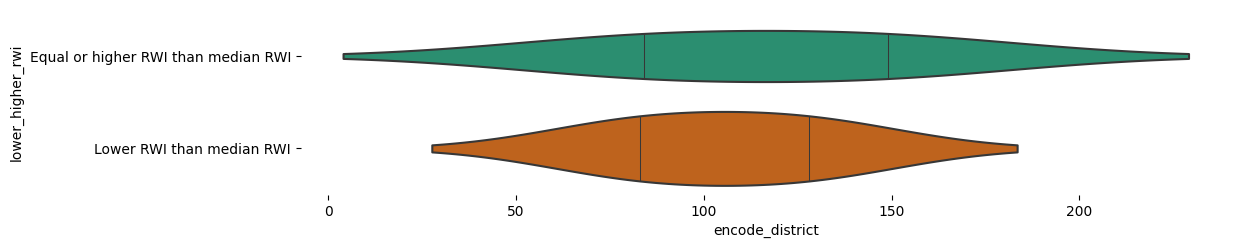

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns

figsize = (12, 1.2 * len(sunburst['lower_higher_rwi'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(sunburst, x='encode_district', y='lower_higher_rwi', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [39]:
test_df = test_df.merge(encode_dist,how='left',on=['encode_district'])\
                                .merge(encode_cr,how='left',on=['encode_city_region'])\
                                .merge(encode_village,how='left',on=['encode_village'])
test_df.to_csv("test_df.csv",sep=',',index=False)


### Modeling - add one more cell tower, does that impact on producing higher RWI?
### How much more cell tower we should build to reach the median
### Sort the count of cell tower should be build to find the priority

In [40]:
# Hypothesis testing, does adding one more model will increase the RWI with current chosen model
## Chosen model is GBR
X_test_v2 = X_test.copy()
X_test_v2['y_true'] = y_test
X_test_v2

,population,encode_district,encode_city_region,encode_province,encode_village,encode_class,log_tower_count,y_true
948,5218.0,158,1,2,1098,1,0.693147,0.302624
218,4864.0,86,0,2,702,2,1.386294,0.569396
1080,52429.0,155,12,0,846,1,1.386294,0.329908
414,8480.0,56,1,2,290,0,3.688879,0.995344
2012,29947.0,40,12,0,320,0,4.682131,0.927948
...,...,...,...,...,...,...,...,...
23,33156.0,164,1,2,1110,0,3.988984,0.982826
1891,14802.0,117,12,0,402,0,4.304065,0.962934
427,11498.0,46,4,2,705,0,6.347389,1.063600
1628,72191.0,85,5,1,325,3,7.112327,1.577586


In [41]:
math.log(10)

2.302585092994046

In [42]:
# Added 10% of the tower_count
# math.log(10) means more 10 cell tower (look at math.log(10))
X_test_v2['log_tower_count'] = X_test_v2['log_tower_count'].apply(lambda x: x + 2.302585092994046)
X_test_v2

,population,encode_district,encode_city_region,encode_province,encode_village,encode_class,log_tower_count,y_true
948,5218.0,158,1,2,1098,1,2.995732,0.302624
218,4864.0,86,0,2,702,2,3.688879,0.569396
1080,52429.0,155,12,0,846,1,3.688879,0.329908
414,8480.0,56,1,2,290,0,5.991465,0.995344
2012,29947.0,40,12,0,320,0,6.984716,0.927948
...,...,...,...,...,...,...,...,...
23,33156.0,164,1,2,1110,0,6.291569,0.982826
1891,14802.0,117,12,0,402,0,6.606650,0.962934
427,11498.0,46,4,2,705,0,8.649974,1.063600
1628,72191.0,85,5,1,325,3,9.414913,1.577586


In [43]:
X_test_v2['new_prediction_after_add'] = GBR.predict(X_test_v2.drop('y_true',axis=1))
X_test_v2

,population,encode_district,encode_city_region,encode_province,encode_village,encode_class,log_tower_count,y_true,new_prediction_after_add
948,5218.0,158,1,2,1098,1,2.995732,0.302624,0.335528
218,4864.0,86,0,2,702,2,3.688879,0.569396,0.681121
1080,52429.0,155,12,0,846,1,3.688879,0.329908,0.313982
414,8480.0,56,1,2,290,0,5.991465,0.995344,0.997052
2012,29947.0,40,12,0,320,0,6.984716,0.927948,0.969229
...,...,...,...,...,...,...,...,...,...
23,33156.0,164,1,2,1110,0,6.291569,0.982826,1.008530
1891,14802.0,117,12,0,402,0,6.606650,0.962934,0.985150
427,11498.0,46,4,2,705,0,8.649974,1.063600,1.033116
1628,72191.0,85,5,1,325,3,9.414913,1.577586,1.543685


In [44]:
X_test_v2['res_with_ytrue'] = X_test_v2['new_prediction_after_add'] - X_test_v2['y_true']
X_test_v2

,population,encode_district,encode_city_region,encode_province,encode_village,encode_class,log_tower_count,y_true,new_prediction_after_add,res_with_ytrue
948,5218.0,158,1,2,1098,1,2.995732,0.302624,0.335528,0.032904
218,4864.0,86,0,2,702,2,3.688879,0.569396,0.681121,0.111725
1080,52429.0,155,12,0,846,1,3.688879,0.329908,0.313982,-0.015926
414,8480.0,56,1,2,290,0,5.991465,0.995344,0.997052,0.001707
2012,29947.0,40,12,0,320,0,6.984716,0.927948,0.969229,0.041280
...,...,...,...,...,...,...,...,...,...,...
23,33156.0,164,1,2,1110,0,6.291569,0.982826,1.008530,0.025704
1891,14802.0,117,12,0,402,0,6.606650,0.962934,0.985150,0.022216
427,11498.0,46,4,2,705,0,8.649974,1.063600,1.033116,-0.030484
1628,72191.0,85,5,1,325,3,9.414913,1.577586,1.543685,-0.033901


### Conclusion: Model predict higher RWI will be produced if the more cell tower count are added (Overall)


### Next: How does model predict based on the district?

In [45]:
X_test_v2['impact'] = 'no_improvement_impact'
X_test_v2.loc[X_test_v2['res_with_ytrue'] >0,'impact'] = 'pos_impact'
X_test_v2

,population,encode_district,encode_city_region,encode_province,encode_village,encode_class,log_tower_count,y_true,new_prediction_after_add,res_with_ytrue,impact
948,5218.0,158,1,2,1098,1,2.995732,0.302624,0.335528,0.032904,pos_impact
218,4864.0,86,0,2,702,2,3.688879,0.569396,0.681121,0.111725,pos_impact
1080,52429.0,155,12,0,846,1,3.688879,0.329908,0.313982,-0.015926,no_improvement_impact
414,8480.0,56,1,2,290,0,5.991465,0.995344,0.997052,0.001707,pos_impact
2012,29947.0,40,12,0,320,0,6.984716,0.927948,0.969229,0.041280,pos_impact
...,...,...,...,...,...,...,...,...,...,...,...
23,33156.0,164,1,2,1110,0,6.291569,0.982826,1.008530,0.025704,pos_impact
1891,14802.0,117,12,0,402,0,6.606650,0.962934,0.985150,0.022216,pos_impact
427,11498.0,46,4,2,705,0,8.649974,1.063600,1.033116,-0.030484,no_improvement_impact
1628,72191.0,85,5,1,325,3,9.414913,1.577586,1.543685,-0.033901,no_improvement_impact


### Negative Impact and Positive Impact

In [ ]:
# impact_on_district = X_test_v2.groupby(['encode_district','impact'])['encode_class'].count().reset_index()

fig = px.pie(X_test_v2.groupby('impact')['encode_district'].count().reset_index()
             ,values='encode_district',names='impact'
            ,title='Percentage of positive or negative impact by adding 10 of cell tower in test dataset (20%)')
fig.show()

In [ ]:
print("Sum of the negative impact = ",sum(X_test_v2[X_test_v2['impact'] == 'no_improvement_impact']['res_with_ytrue']))
print("Sum of the positive impact = ",sum(X_test_v2[X_test_v2['impact'] == 'pos_impact']['res_with_ytrue']))

fig = px.box(X_test_v2, y="res_with_ytrue",x='impact')
fig.show()

Sum of the negative impact =  -4.401577688581726
Sum of the positive impact =  12.571458426695786


### Focus on the lower RWI ( Ignore the negative impact, since it means we dont need more cell tower for that region )
### Focus on the lower RWI and the positive impact

In [ ]:
X_test_v2['lower_higher_rwi'] = 'Lower RWI than median RWI'

# Set which region has lower or higher RWI
X_test_v2.loc[X_test_v2['y_true'] >= median_rwi,'lower_higher_rwi'] = 'Equal or higher RWI than median RWI'

# What percentage from Lower RWI to become Higher RWI
X_test_v2['lower_higher_rwi_after_pred'] = 'No Improvement RWI pred'

X_test_v2.loc[X_test_v2['new_prediction_after_add'] >= X_test_v2['y_true'],'lower_higher_rwi_after_pred'] = 'Improvement RWI pred'
X_test_v2.loc[X_test_v2['new_prediction_after_add'] >= median_rwi,'lower_higher_rwi_after_pred'] = 'Equal or higher RWI pred'

In [ ]:
# Choose Lower RWI and see the impact of changes to the prediction after adding the total cell tower count
rwi_changes = X_test_v2[(X_test_v2['lower_higher_rwi'] == 'Lower RWI than median RWI')]

rwi_changes = rwi_changes.groupby(['lower_higher_rwi','impact','lower_higher_rwi_after_pred'])\
                ['encode_class'].count().reset_index().rename(columns={'encode_class':'total_count'})
rwi_changes

,lower_higher_rwi,impact,lower_higher_rwi_after_pred,total_count
0,Lower RWI than median RWI,no_improvement_impact,No Improvement RWI pred,47
1,Lower RWI than median RWI,pos_impact,Equal or higher RWI pred,58
2,Lower RWI than median RWI,pos_impact,Improvement RWI pred,106


In [ ]:
# # See the percentage
# Lower RWI + 10% cell tower count -> 58% positive impact
# 16% of the positive impact change Lower RWI than median to Higher than the median

rwi_changes['total_count_pct'] =  rwi_changes['total_count'] / sum(rwi_changes['total_count']) * 100
rwi_changes

,lower_higher_rwi,impact,lower_higher_rwi_after_pred,total_count,total_count_pct
0,Lower RWI than median RWI,no_improvement_impact,No Improvement RWI pred,47,22.274882
1,Lower RWI than median RWI,pos_impact,Equal or higher RWI pred,58,27.488152
2,Lower RWI than median RWI,pos_impact,Improvement RWI pred,106,50.236967


## 1. Lower RWI Region/Village change Lower -> Higher RWI (pred). (First Priority Areas of development)

In [ ]:
# Get the geometry

# Merge the data between test dataframe and add on lower_higher_rwi

print("Before the district",X_test_v2.shape)
X_test_v2 = X_test_v2.merge(df[['encode_village','rwi','population','geometry']].rename(columns={'rwi':'y_true'}).drop_duplicates(),how='left',on=['encode_village','y_true','population'])
print('After',X_test_v2.shape)

Before the district (444, 12)
After (444, 13)


In [ ]:
display(X_test_v2.head())

,population,encode_district,encode_city_region,encode_village,encode_class,log_tower_count,y_true,new_prediction_after_add,res_with_ytrue,impact,lower_higher_rwi,lower_higher_rwi_after_pred,geometry
0,5218.0,158,1,1098,1,2.995732,0.302624,0.335528,0.032904,pos_impact,Lower RWI than median RWI,Improvement RWI pred,"MULTIPOLYGON (((107.07053 -6.52437, 107.07103 ..."
1,4864.0,86,0,702,2,3.688879,0.569396,0.681121,0.111725,pos_impact,Lower RWI than median RWI,Improvement RWI pred,"MULTIPOLYGON (((107.25032 -6.21971, 107.25035 ..."
2,52429.0,155,12,846,1,3.688879,0.329908,0.314189,-0.015719,no_improvement_impact,Lower RWI than median RWI,No Improvement RWI pred,"MULTIPOLYGON (((106.55651 -6.06663, 106.55642 ..."
3,8480.0,56,1,290,0,5.991465,0.995344,0.997052,0.001707,pos_impact,Equal or higher RWI than median RWI,Equal or higher RWI pred,"MULTIPOLYGON (((106.69759 -6.44036, 106.697462..."
4,29947.0,40,12,320,0,6.984716,0.927948,0.969229,0.041280,pos_impact,Lower RWI than median RWI,Equal or higher RWI pred,"MULTIPOLYGON (((106.5448827 -6.2359564, 106.54..."


In [ ]:
lower_rwi_increased_pred = X_test_v2[(X_test_v2['lower_higher_rwi'] == 'Lower RWI than median RWI')
                      & (X_test_v2['impact'] == 'pos_impact')
                      & (X_test_v2['lower_higher_rwi_after_pred'] == 'Equal or higher RWI pred')]
print(lower_rwi_increased_pred.shape)

lower_rwi_increased_pred.head()

(58, 13)


,population,encode_district,encode_city_region,encode_village,encode_class,log_tower_count,y_true,new_prediction_after_add,res_with_ytrue,impact,lower_higher_rwi,lower_higher_rwi_after_pred,geometry
4,29947.0,40,12,320,0,6.984716,0.927948,0.969229,0.041280,pos_impact,Lower RWI than median RWI,Equal or higher RWI pred,"MULTIPOLYGON (((106.5448827 -6.2359564, 106.54..."
8,13384.0,14,3,1101,0,7.575585,0.941107,0.994076,0.052969,pos_impact,Lower RWI than median RWI,Equal or higher RWI pred,"MULTIPOLYGON (((106.8197352 -6.6217598, 106.81..."
9,13001.0,43,1,705,0,7.237059,0.886923,0.974904,0.087982,pos_impact,Lower RWI than median RWI,Equal or higher RWI pred,"MULTIPOLYGON (((107.0102766 -6.4025751, 107.01..."
12,9360.0,40,12,1086,0,7.517521,0.912396,0.977678,0.065282,pos_impact,Lower RWI than median RWI,Equal or higher RWI pred,"MULTIPOLYGON (((106.5129102 -6.2278746, 106.51..."
14,10391.0,26,1,293,0,5.438079,0.888839,0.961808,0.072969,pos_impact,Lower RWI than median RWI,Equal or higher RWI pred,"MULTIPOLYGON (((106.8644867 -6.6891888, 106.86..."


In [ ]:
lower_rwi_increased_pred = lower_rwi_increased_pred.merge(encode_dist,how='left',on=['encode_district'])\
                                .merge(encode_cr,how='left',on=['encode_city_region'])\
                                .merge(encode_village,how='left',on=['encode_village'])
lower_rwi_increased_pred.to_csv("lower_rwi_than_median_become_higher.csv",sep=',',index=False)

## 2. Lower RWI Region/Village give positive impact. (Second priority of development)

In [ ]:
lower_rwi_pos_impact = X_test_v2[(X_test_v2['lower_higher_rwi'] == 'Lower RWI than median RWI')
                      & (X_test_v2['impact'] == 'pos_impact')
                      & (X_test_v2['lower_higher_rwi_after_pred'] != 'Equal or higher RWI pred')]
print(lower_rwi_pos_impact.shape)

lower_rwi_pos_impact.head()

(106, 13)


,population,encode_district,encode_city_region,encode_village,encode_class,log_tower_count,y_true,new_prediction_after_add,res_with_ytrue,impact,lower_higher_rwi,lower_higher_rwi_after_pred,geometry
0,5218.0,158,1,1098,1,2.995732,0.302624,0.335528,0.032904,pos_impact,Lower RWI than median RWI,Improvement RWI pred,"MULTIPOLYGON (((107.07053 -6.52437, 107.07103 ..."
1,4864.0,86,0,702,2,3.688879,0.569396,0.681121,0.111725,pos_impact,Lower RWI than median RWI,Improvement RWI pred,"MULTIPOLYGON (((107.25032 -6.21971, 107.25035 ..."
10,31598.0,93,12,493,1,4.248495,0.210148,0.302750,0.092601,pos_impact,Lower RWI than median RWI,Improvement RWI pred,"MULTIPOLYGON (((106.47335 -6.04465, 106.4734 -..."
11,4679.0,1,0,789,2,3.688879,0.617344,0.668924,0.051580,pos_impact,Lower RWI than median RWI,Improvement RWI pred,"MULTIPOLYGON (((107.06211 -6.07375, 107.06205 ..."
13,15082.0,139,12,923,2,5.393628,0.766663,0.788753,0.022090,pos_impact,Lower RWI than median RWI,Improvement RWI pred,"MULTIPOLYGON (((106.51833 -6.1037398, 106.5183..."


In [ ]:
lower_rwi_pos_impact = lower_rwi_pos_impact.merge(encode_dist,how='left',on=['encode_district'])\
                                .merge(encode_cr,how='left',on=['encode_city_region'])\
                                .merge(encode_village,how='left',on=['encode_village'])
lower_rwi_pos_impact.to_csv("lower_rwi_have_pos_impact.csv",sep=',',index=False)

## 3. How many towers should we add in order to give positive impact RWI,total to reach the median.
## By adding 10 cell towers -> calculate average increment of RWI

In [ ]:
pos_impact_rwi = X_test_v2[(X_test_v2['impact'] == 'pos_impact')]
lower_rwi_pos_impact = X_test_v2[(X_test_v2['lower_higher_rwi'] == 'Lower RWI than median RWI')
                      & (X_test_v2['impact'] == 'pos_impact')]

print("The result of adding 10 cell towers (overall)",pos_impact_rwi['res_with_ytrue'].mean())
print("The result of adding 10 cell towers (Lower RWI than median RWI)",lower_rwi_pos_impact['res_with_ytrue'].mean())

The result of adding 10 cell towers (overall) 0.04162734578376088
The result of adding 10 cell towers (Lower RWI than median RWI) 0.06006986221285957


In [ ]:
pos_impact_rwi = pos_impact_rwi.merge(encode_dist,how='left',on=['encode_district'])\
                                .merge(encode_cr,how='left',on=['encode_city_region'])\
                                .merge(encode_village,how='left',on=['encode_village'])

pos_impact_rwi.to_csv("test_dataset_have_pos_impact.csv",sep=',',index=False)

In [ ]:
# 1. Lower RWI Region/Village change Lower -> Higher RWI (pred).
# 2. Lower RWI Region/Village give positive impact.
# 3. How many towers should we add in order to give positive impact RWI,total to reach the median.

In [ ]:
%%shell
jupyter nbconvert --to html --TagRemovePreprocessor.remove_cell_tags='{"hide_code"}' Modelling_v4.ipynb

/usr/local/lib/python3.10/dist-packages/traitlets/traitlets.py:2915: FutureWarning: --TagRemovePreprocessor.remove_cell_tags={"hide_code"} for containers is deprecated in traitlets 5.0. You can pass `--TagRemovePreprocessor.remove_cell_tags item` ... multiple times to add items to a list.
  warn(
[NbConvertApp] Converting notebook Modelling_v4.ipynb to html
[NbConvertApp] Writing 1383206 bytes to Modelling_v4.html
